In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
raw_data = np.array(pd.read_excel("weather.xlsx")).astype(np.float)

/tmp/ipykernel_90332/1734414067.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_data = np.array(pd.read_excel("weather.xlsx")).astype(np.float)


In [8]:
x = np.array([i for i in range(raw_data.shape[0]-1)]).reshape(-1,1)
y = raw_data[1:,5].reshape(-1,1)

In [4]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

In [5]:
from sklearn.metrics import mean_squared_error , mean_absolute_error #平均均方误差/平均绝对误差
import math
#mean_absolute_percentage_error 平均绝对百分比误差
def mean_absolute_percentage_error(y, pred):
    mask = y != 0
    y = y[mask]
    pred = pred[mask]
    mape = np.abs((y - pred) / y)
    mape = np.mean(mape) * 100
    return mape


def eval(y, pred):
    mse = mean_squared_error(y, pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y, pred)
    mape = mean_absolute_percentage_error(y, pred)
    return [rmse, mae, mape]

In [6]:
def visulization(y_predict,y_true):
    x1=np.linspace(0,len(y_predict),len(y_predict))
    for i in range(y_predict.shape[-1]):
        plt.plot(x1,y_predict[:,i],label='predict',linewidth=1.5)
        plt.plot(x1,y_true[:,i],label='truth',linewidth=1.5)
        plt.xlabel("time")
        plt.ylabel("wind")
        plt.legend()
        plt.show()

(481, 3)
(481, 3)
rmse: 2.692101691892707 mae: 2.007541401442317 mape: 56.64045941429213


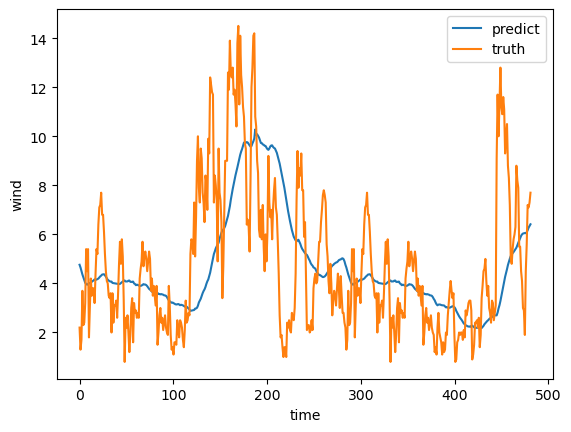

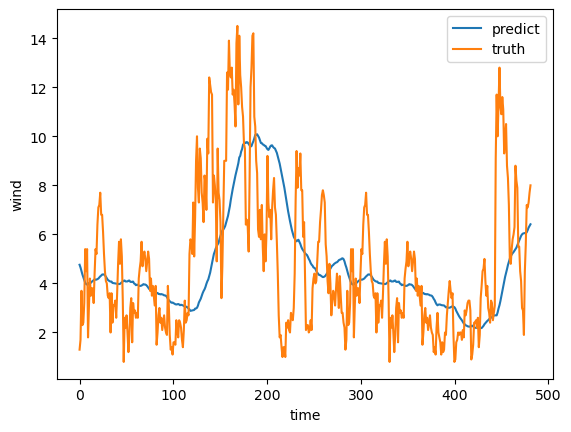

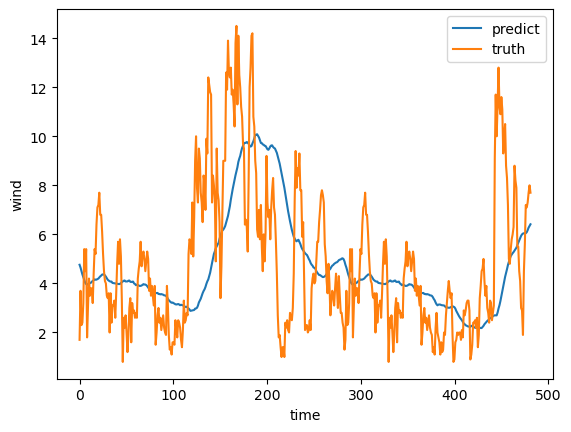

In [9]:
def predict(x,y,window_size,predict_step,func,eval,visulization):
    predict = []
    test = []
    for i in range(1,x.shape[0]-window_size-predict_step+1):
        temp_train_x = raw_data[i:i+window_size,:]
        temp_train_y = y[i:i+window_size]
        temp_test_x = raw_data[i+window_size:i+window_size+predict_step,:]
        temp_test_y = y[i+window_size:i+window_size+predict_step]
        temp_predict = func.fit(temp_train_x,temp_train_y.reshape(-1)).predict(temp_test_x)
        predict.append(temp_predict)
        test.append(temp_test_y)
    predict = np.array(predict).squeeze()
    test = np.array(test).squeeze()
    print(predict.shape)
    print(test.shape)
    [rmse, mae, mape] = eval(test,predict)
    print("rmse:",rmse,"mae:",mae,"mape:",mape)
    visulization(predict,test)
predict(x,y,50,3,svr_rbf,eval,visulization)